In [ ]:
from bs4 import BeautifulSoup
import json
import numpy as np 
import math

with open('../agreements.html', 'r') as fp:
    html = fp.read()
# Parse the HTML
soup = BeautifulSoup(html, "html.parser")
rows = soup.find_all("tr")[1:]  # skip header row

# Extract data
data = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) != 3:
        continue
    doc = cols[0].text.strip()
    if cols[1].text.strip() == 'NaN':
      continue
    score = float(cols[1].text.strip())
    annotator_title = cols[2].get("title", "")
    annotators = [name.strip() for name in annotator_title.split(",")]

    data.append({
        "Document": doc,
        "Score": score,
        "Annotators": annotators
    })

# files = [d["Document"] for d in data]
# scores = np.array([d["Score"] for d in data])


138 138


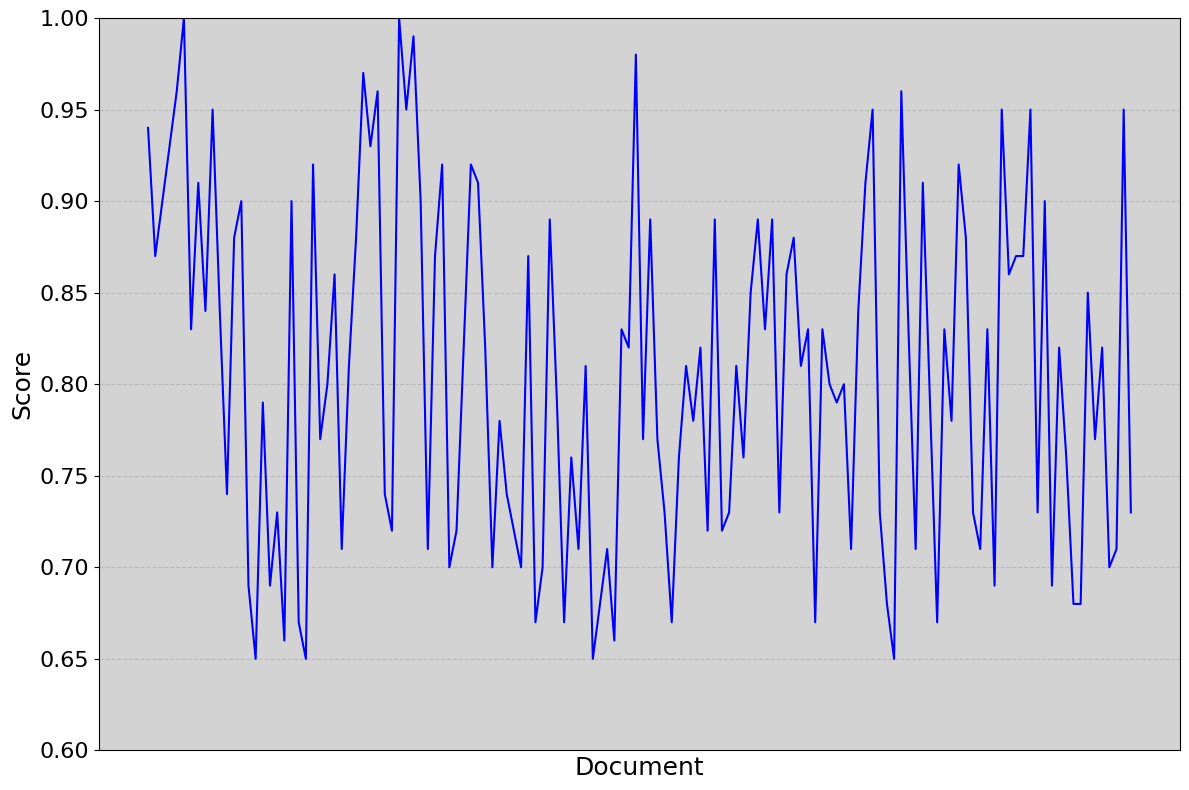

Total number of documents:  138
Total number of scores:  138 , mean:  0.8054347826086957 , std:  0.09558454460309851


In [ ]:
import matplotlib.pyplot as plt
# xs, ys = files, scores
xs, ys = [], []
for d in data:
  if d['Score'] >= 0.65:
    xs.append(d["Document"])
    ys.append(d["Score"])

print(len(xs), len(ys))   

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('lightgray')  # sets axes background color
ax.plot(xs, ys, linestyle='-', color='blue')

plt.xlabel("Document", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.xticks([])
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.axhline(y=0.7, color='red', linestyle='--', linewidth=1.5, label='Threshold = 0.7')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.6, 1)
plt.tight_layout()
plt.savefig("agreements.png", dpi=300, bbox_inches='tight')
plt.show()

print("Total number of documents: ", len(xs))
print("Total number of scores: ", len(ys), ", mean: ", np.mean(ys), ", std: ", np.std(ys))